In [1]:
# for basic operations
import numpy as np
import pandas as pd
import pandas_profiling

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for advanced visualizations 
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from bubbly.bubbly import bubbleplot

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# for model explanation
import shap
pd.set_option('mode.chained_assignment', None)

In [3]:
data4 = pd.read_csv('statlog1.csv',index_col=[0])

In [4]:
data4.columns= ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
data4.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
data4.head(3)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   70    1   4       130   322    0        2      109      0      2.4      2   
1   67    0   3       115   564    0        2      160      0      1.6      2   
2   57    1   2       124   261    0        0      141      0      0.3      1   

   ca  thal  target  
0   3     3       1  
1   0     7       0  
2   0     7       1

In [6]:
data4.describe()

age         sex          cp    trestbps        chol         fbs  \
count  270.000000  270.000000  270.000000  270.000000  270.000000  270.000000   
mean    54.433333    0.677778    3.174074  131.344444  249.659259    0.148148   
std      9.109067    0.468195    0.950090   17.861608   51.686237    0.355906   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  213.000000    0.000000   
50%     55.000000    1.000000    3.000000  130.000000  245.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  280.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang    oldpeak       slope          ca  \
count  270.000000  270.000000  270.000000  270.00000  270.000000  270.000000   
mean     1.022222  149.677778    0.329630    1.05000    1.585185    0.670370   
std      0.997891   23.165717    0.470952    1.14521    0.614390    0.943896   
min      0.000000   71.000000    0.000000    0.00000    1.000000    0.000000   
25%      0.000000  133.000000    0.000000    0.00000    1.000000    0.000000   
50%      2.000000  153.500000    0.000000    0.80000    2.000000    0.000000   
75%      2.000000  166.000000    1.000000    1.60000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.20000    3.000000    3.000000   

             thal      target  
count  270.000000  270.000000  
mean     4.696296    0.444444  
std      1.940659    0.497827  
min      3.000000    0.000000  
25%      3.000000    0.000000  
50%      3.000000    0.000000  
75%      7.000000    1.000000  
max      7.000000    1.000000

In [7]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 31.6 KB


In [8]:
init_notebook_mode()

In [9]:
data4.sort_values(by=['age'], inplace=True)

In [10]:
import warnings
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = data4, x_column = 'trestbps', y_column = 'chol', 
    bubble_column = 'sex', time_column = 'age', size_column = 'oldpeak', color_column = 'sex', 
    x_title = "Resting Blood Pressure", y_title = "Cholestrol", title = 'BP vs Chol. vs Age vs Sex vs Heart Rate',
    x_logscale = False, scale_bubble = 4, height = 650)


# py.iplot(figure, config={'scrollzoom': True})
py.iplot(figure, config={'scrollzoom': False})

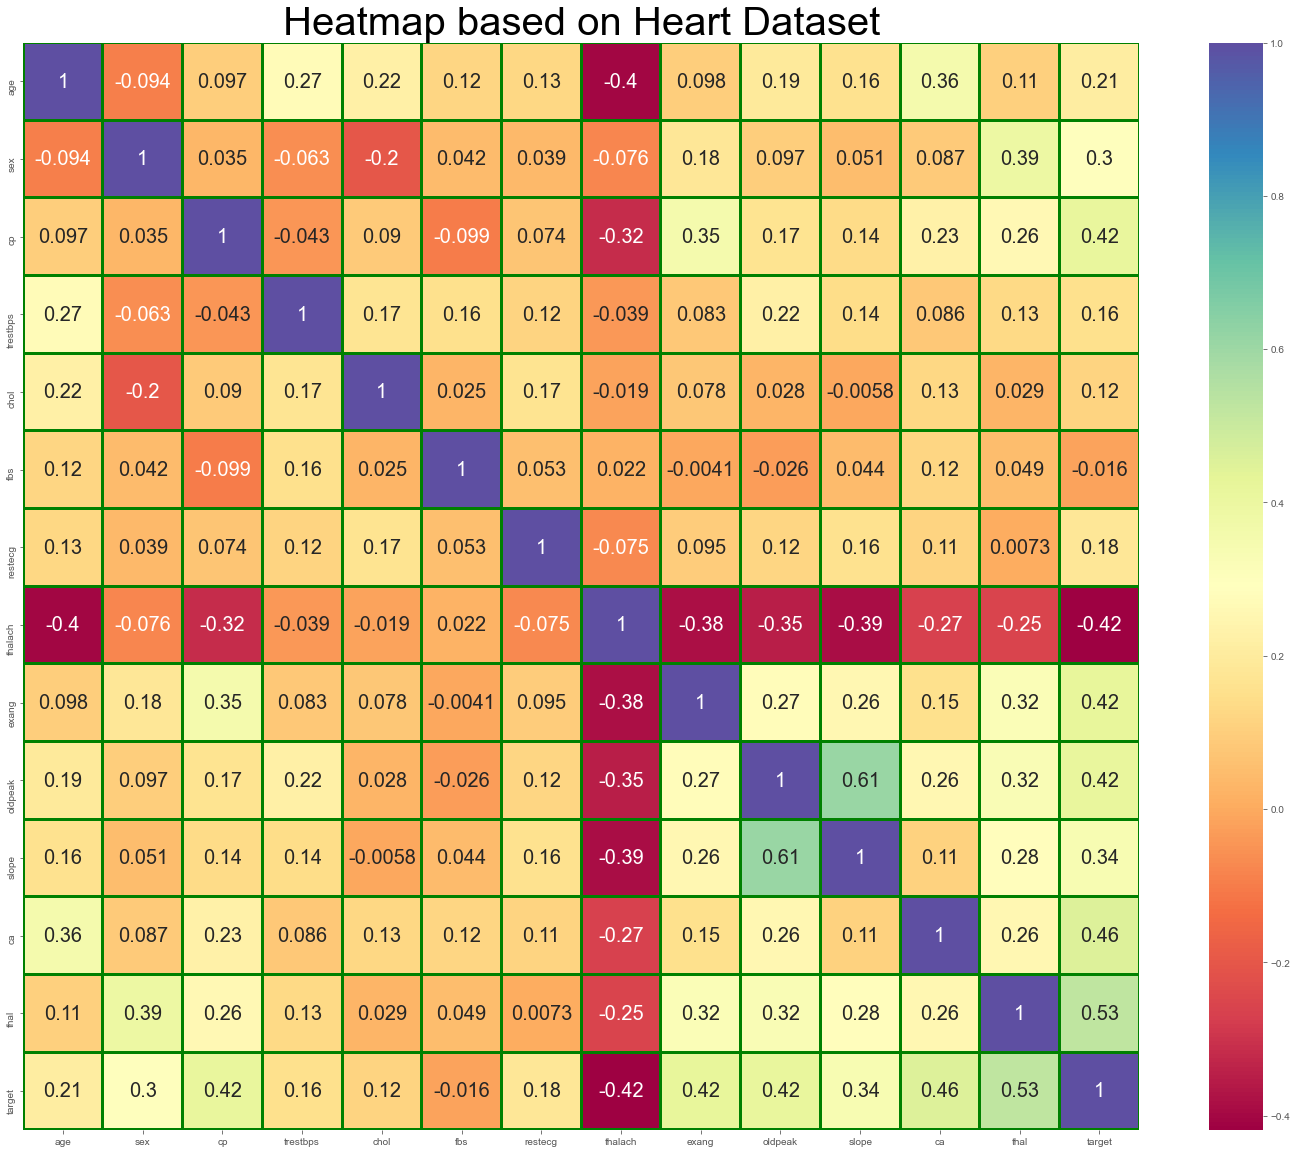

In [11]:
# making a heat map
from pylab import savefig
plt.rcParams['figure.figsize'] = (25, 20)
plt.style.use('ggplot')
sns.heatmap(data4.corr(), annot = True,linewidths=2, linecolor='green', cmap = 'Spectral',annot_kws={"fontsize":20})
sns.set(font_scale=4)
plt.title('Heatmap based on Heart Dataset', fontsize = 40)
# plt.savefig('heatmap2.png')
plt.show()


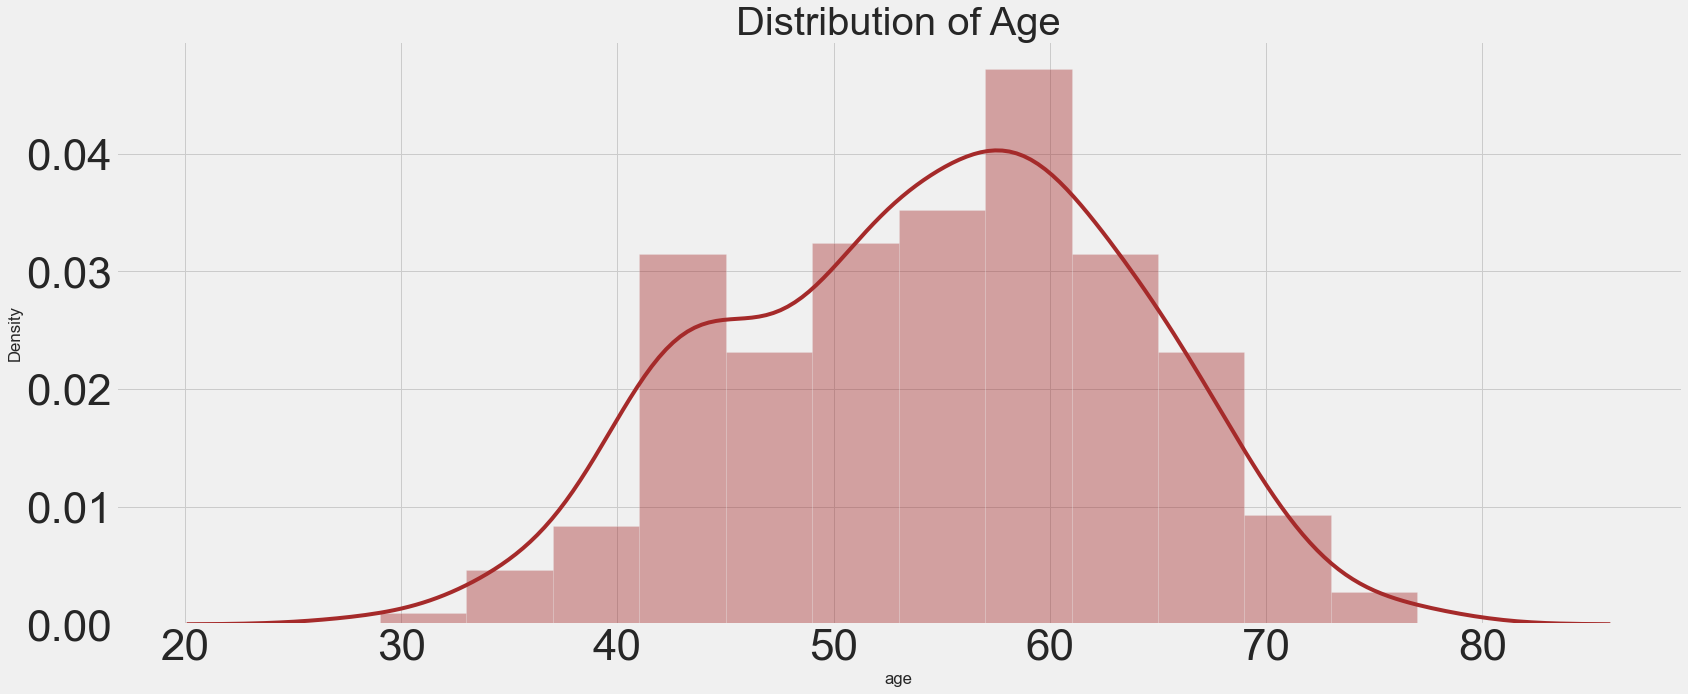

In [12]:
# checking the distribution of age among the patients
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (25, 10)
sns.distplot(data4['age'], color = 'BROWN')
plt.title('Distribution of Age', fontsize = 40)
# plt.savefig('Distribution2.png')
plt.show()


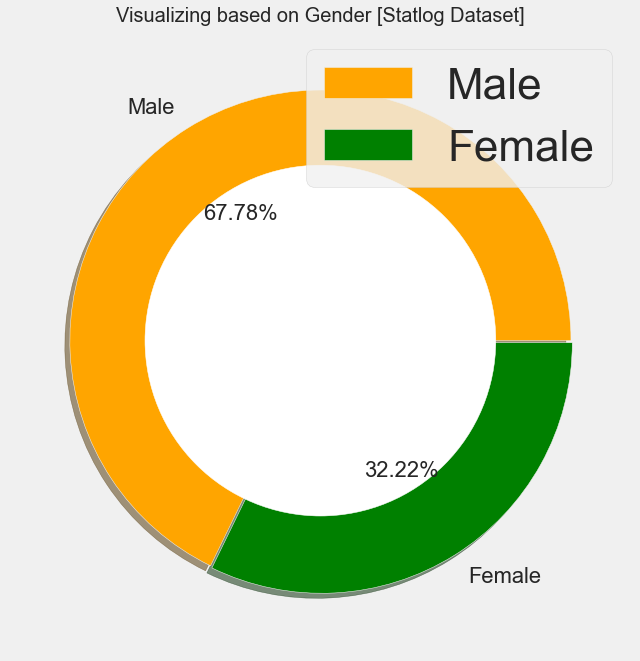

In [13]:
# plotting a donut chart for visualizing each of the recruitment channel's share

size = data4['sex'].value_counts()
colors = ['orange', 'green']
labels = "Male", "Female"
explode = [0, 0.01]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')
plt.rcParams['figure.figsize'] = (10, 15)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%',textprops={'fontsize': 22})
plt.title('Visualizing based on Gender [Statlog Dataset]', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
# plt.savefig('Gender2.png')
plt.show()


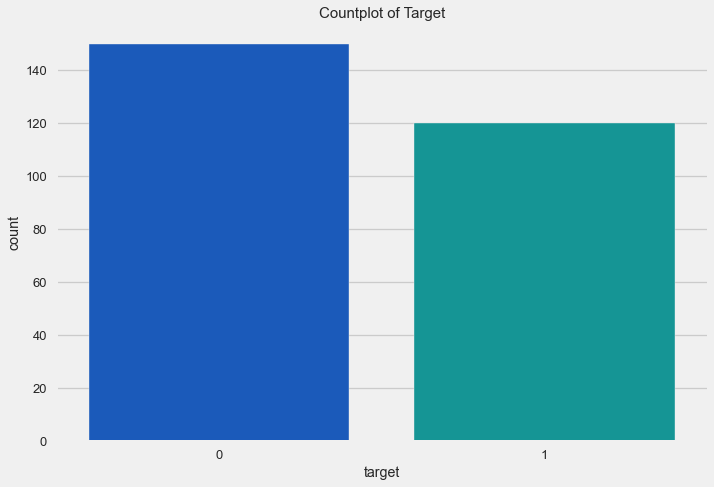

In [14]:
# plotting the target attribute

plt.rcParams['figure.figsize'] = (18, 8)
plt.style.use('seaborn-talk')
sns.countplot(data4['target'], palette = 'winter')
plt.title('Countplot of Target', fontsize = 15)
# plt.savefig('Target2.png')
plt.show()


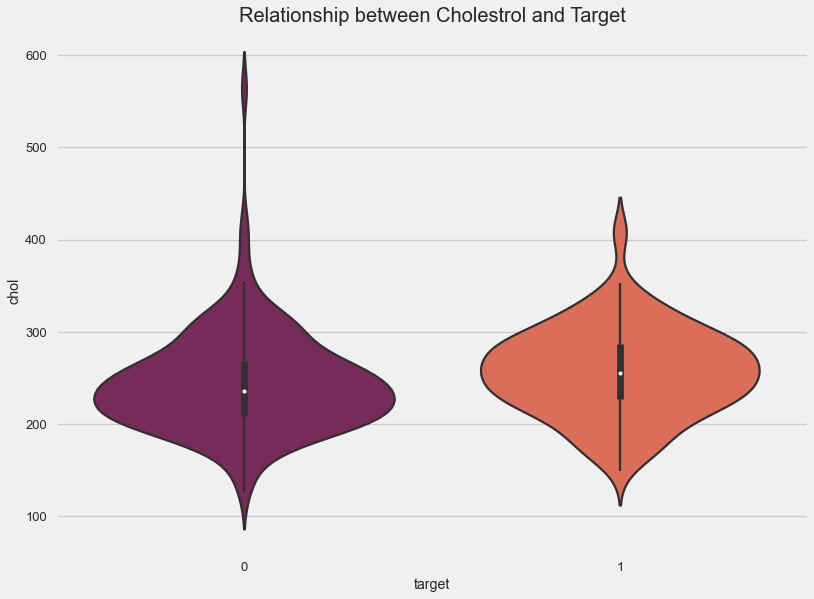

In [15]:
# cholestrol vs target

plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(data4['target'], data4['chol'], palette = 'rocket')
plt.title('Relationship between Cholestrol and Target', fontsize = 20, fontweight = 30)
# plt.savefig('Chol_target2.png')
plt.show()


In [16]:
# data4.columns =['age','sex','cp','trestbps','chol','fbs','restecg','thalach',
#                 'exang','oldpeak','slope','ca','thal','target']

data4.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

data4.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [17]:
data4['sex'][data4['sex'] == 0] = 'female'
data4['sex'][data4['sex'] == 1] = 'male'

data4['chest_pain_type'][data4['chest_pain_type'] == 1] = 'typical angina'
data4['chest_pain_type'][data4['chest_pain_type'] == 2] = 'atypical angina'
data4['chest_pain_type'][data4['chest_pain_type'] == 3] = 'non-anginal pain'
data4['chest_pain_type'][data4['chest_pain_type'] == 4] = 'asymptomatic'

data4['fasting_blood_sugar'][data4['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data4['fasting_blood_sugar'][data4['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

data4['rest_ecg'][data4['rest_ecg'] == 0] = 'normal'
data4['rest_ecg'][data4['rest_ecg'] == 1] = 'ST-T wave abnormality'
data4['rest_ecg'][data4['rest_ecg'] == 2] = 'left ventricular hypertrophy'

data4['exercise_induced_angina'][data4['exercise_induced_angina'] == 0] = 'no'
data4['exercise_induced_angina'][data4['exercise_induced_angina'] == 1] = 'yes'

data4['st_slope'][data4['st_slope'] == 1] = 'upsloping'
data4['st_slope'][data4['st_slope'] == 2] = 'flat'
data4['st_slope'][data4['st_slope'] == 3] = 'downsloping'

data4['thalassemia'][data4['thalassemia'] == 3] = 'normal'
data4['thalassemia'][data4['thalassemia'] == 6] = 'fixed defect'
data4['thalassemia'][data4['thalassemia'] == 7] = 'reversable defect'



In [18]:
data4.head()

age     sex  chest_pain_type  resting_blood_pressure  cholesterol  \
214   29    male  atypical angina                     130          204   
174   34    male   typical angina                     118          182   
138   34  female  atypical angina                     118          210   
224   35  female     asymptomatic                     138          183   
81    35    male     asymptomatic                     120          198   

     fasting_blood_sugar                      rest_ecg  \
214  lower than 120mg/ml  left ventricular hypertrophy   
174  lower than 120mg/ml  left ventricular hypertrophy   
138  lower than 120mg/ml                        normal   
224  lower than 120mg/ml                        normal   
81   lower than 120mg/ml                        normal   

     max_heart_rate_achieved exercise_induced_angina  st_depression  \
214                      202                      no            0.0   
174                      174                      no            0.0   
138                      192                      no            0.7   
224                      182                      no            1.4   
81                       130                     yes            1.6   

      st_slope  num_major_vessels        thalassemia  target  
214  upsloping                  0             normal       0  
174  upsloping                  0             normal       0  
138  upsloping                  0             normal       0  
224  upsloping                  0             normal       0  
81        flat                  0  reversable defect       1

In [20]:
y = data4['target']

data4 = data4.drop('target', axis = 1)

print("Shape of y:", y.shape)

Shape of y: (270,)


In [21]:
# one hot encoding of the data
# drop_first = True, means dropping the first categories from each of the attribues 
# for ex gender having gender_male and gender-female would be male having values 1 and 0
data4 = pd.get_dummies(data4, drop_first=True)

In [22]:
data4.head()

age  resting_blood_pressure  cholesterol  max_heart_rate_achieved  \
214   29                     130          204                      202   
174   34                     118          182                      174   
138   34                     118          210                      192   
224   35                     138          183                      182   
81    35                     120          198                      130   

     st_depression  num_major_vessels  sex_male  \
214            0.0                  0         1   
174            0.0                  0         1   
138            0.7                  0         0   
224            1.4                  0         0   
81             1.6                  0         1   

     chest_pain_type_atypical angina  chest_pain_type_non-anginal pain  \
214                                1                                 0   
174                                0                                 0   
138                                1                                 0   
224                                0                                 0   
81                                 0                                 0   

     chest_pain_type_typical angina  fasting_blood_sugar_lower than 120mg/ml  \
214                               0                                        1   
174                               1                                        1   
138                               0                                        1   
224                               0                                        1   
81                                0                                        1   

     rest_ecg_left ventricular hypertrophy  rest_ecg_normal  \
214                                      1                0   
174                                      1                0   
138                                      0                1   
224                                      0                1   
81                                       0                1   

     exercise_induced_angina_yes  st_slope_flat  st_slope_upsloping  \
214                            0              0                   1   
174                            0              0                   1   
138                            0              0                   1   
224                            0              0                   1   
81                             1              1                   0   

     thalassemia_normal  thalassemia_reversable defect  
214                   1                              0  
174                   1                              0  
138                   1                              0  
224                   1                              0  
81                    0                              1

In [23]:
# splitting the dependent and independent variables from the data
x = data4
# checking the shapes of x and y
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (270, 18)
Shape of y: (270,)


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# getting the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (216, 18)
Shape of x_test : (54, 18)
Shape of y_train : (216,)
Shape of y_test : (54,)


**!LOGISTIC REGRESSION MODEL IMPLEMENTATION!** 

Accuracy :  81.48 %

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        30
           1       0.82      0.75      0.78        24

    accuracy                           0.81        54
   macro avg       0.82      0.81      0.81        54
weighted avg       0.82      0.81      0.81        54



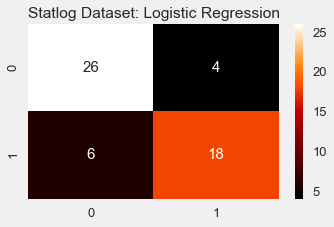

In [25]:
logreg = LogisticRegression(solver='lbfgs',max_iter=1500)
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

 # evaluating the model
accLR = accuracy_score(y_test,y_pred)
print("Accuracy : ", round(accLR*100,2),"%")
# print("Training Accuracy :", logreg.score(x_train, y_train))
# print("Testing Accuracy  :", logreg.score(x_test, y_test))
print("")

# cofusion matrix
cmLR = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 3)
sns.heatmap(cmLR, annot = True, annot_kws = {'size':15}, cmap = 'gist_heat').set(title="Statlog Dataset: Logistic Regression")


# classification report
crLR = classification_report(y_test, y_pred)
print(crLR)

In [26]:
recallLR = recall_score(y_test, y_pred)
print("Recall is: ",recallLR)

precisionLR = precision_score(y_test, y_pred)
print("Precision is: ",precisionLR)

f1_metricLR = f1_score(y_test, y_pred, average = "macro")
print('F1-Score :', f1_metricLR)

Recall is:  0.75
Precision is:  0.8181818181818182
F1-Score : 0.8106591865357644


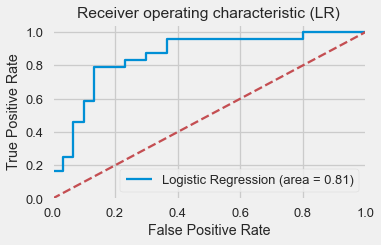

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fprLR, tprLR, thresholdsLR = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fprLR, tprLR, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (LR)',fontweight=30)
plt.legend(loc="lower right")
plt.rcParams['figure.figsize'] = (5, 4)
# plt.savefig('Log_ROC')
plt.show()
 

In [28]:
# let's check the auc score
from sklearn.metrics import auc
aucLR = auc(fprLR, tprLR)
print("AUC Score :", aucLR)

AUC Score : 0.8569444444444445


**!NAIVE BAYES MODEL IMPLEMENTATION!**

Accuracy :  79.63 %
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        30
           1       0.78      0.75      0.77        24

    accuracy                           0.80        54
   macro avg       0.79      0.79      0.79        54
weighted avg       0.80      0.80      0.80        54



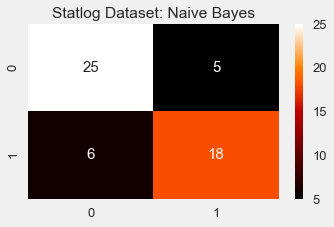

In [29]:
gnb = GaussianNB()
gnb.fit(x_train, y_train.ravel())
y_pred = gnb.predict(x_test)

# evaluating the model
# print("Training Accuracy :", gnb.score(x_train, y_train))
# print("Testing Accuracy  :", gnb.score(x_test, y_test))
accNB = accuracy_score(y_test,y_pred)
print("Accuracy : ", round(accNB*100,2),"%")

# cofusion matrix
cmNB = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 3)
sns.heatmap(cmNB, annot = True, annot_kws = {'size':15}, cmap = 'gist_heat').set(title="Statlog Dataset: Naive Bayes")


# classification report
crNB = classification_report(y_test, y_pred)
print(crNB)

In [30]:
recallNB = recall_score(y_test, y_pred)
print("Recall is: ",recallNB)

precisionNB = precision_score(y_test, y_pred)
print("Precision is: ",precisionNB)

f1_metricNB = f1_score(y_test, y_pred, average = "macro")
print('F1-Score :', f1_metricNB)

Recall is:  0.75
Precision is:  0.782608695652174
F1-Score : 0.7928147889780259


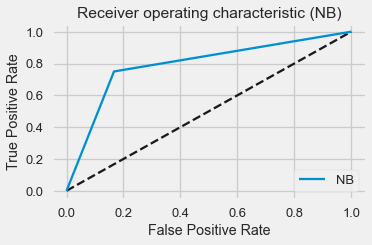

In [31]:
fprNB, tprNB, thresholdsNB = roc_curve(y_test, y_pred)

# Do not change this code! This plots the ROC curve.
# Just replace the fpr and tpr above with the values from your roc_curve
plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fprNB, tprNB, label='NB') #plot the ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (NB)',fontweight=30)
plt.legend(loc="lower right")
plt.rcParams['figure.figsize'] = (5, 4)
plt.show()
 

In [32]:
from sklearn.metrics import auc
aucNB = auc(fprNB, tprNB)
print("AUC Score :", aucNB)

AUC Score : 0.7916666666666667


Accuracy :  77.78 %

              precision    recall  f1-score   support

           0       0.78      0.83      0.81        30
           1       0.77      0.71      0.74        24

    accuracy                           0.78        54
   macro avg       0.78      0.77      0.77        54
weighted avg       0.78      0.78      0.78        54



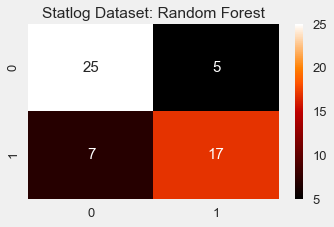

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators = 50, max_depth = 5)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_pred_quant = model.predict_proba(x_test)[:, 1]
y_pred = model.predict(x_test)

# # evaluating the model
accRF = accuracy_score(y_test,y_pred)
print("Accuracy : ",round(accRF*100,2),"%")
# print("Training Accuracy :", model.score(x_train, y_train))
# print("Testing Accuracy  :", model.score(x_test, y_test))
print("")

# cofusion matrix
cmRF = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 3)
sns.heatmap(cmRF, annot = True, annot_kws = {'size':15}, cmap = 'gist_heat').set(title="Statlog Dataset: Random Forest")

from sklearn.metrics import accuracy_score

# classification report
crRF = classification_report(y_test, y_pred)
print(crRF)

In [34]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

recallRF = recall_score(y_test, y_pred)
print("Recall is: ",recallRF)

precisionRF = precision_score(y_test, y_pred)
print("Precision is: ",precisionRF)

f1_metricRF = f1_score(y_test, y_pred, average = "macro")
print('F1-Score :', f1_metricRF)

Recall is:  0.7083333333333334
Precision is:  0.7727272727272727
F1-Score : 0.7727910238429173


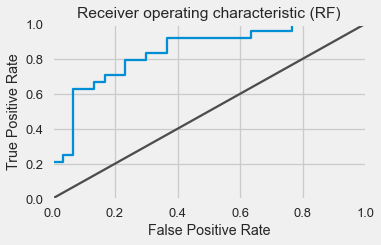

In [35]:
from sklearn.metrics import roc_curve

fprRF,tprRF, thresholdsRF = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fprRF, tprRF)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (RF)',fontweight=30)
# plt.legend(loc="lower right")
plt.rcParams['figure.figsize'] = (5, 4)
plt.show()

In [36]:
# let's check the auc score

from sklearn.metrics import auc
aucRF = auc(fprRF, tprRF)
print("AUC Score :", aucRF)

AUC Score : 0.8402777777777778


In [38]:
data1 = pd.read_csv('statlog1.csv',index_col=[0])

In [39]:
data1.head()

age  sex  chest  resting_blood_pressure  serum_cholestoral  \
0   70    1      4                     130                322   
1   67    0      3                     115                564   
2   57    1      2                     124                261   
3   64    1      4                     128                263   
4   74    0      2                     120                269   

   fasting_blood_sugar  resting_electrocardiographic_results  \
0                    0                                     2   
1                    0                                     2   
2                    0                                     0   
3                    0                                     0   
4                    0                                     2   

   maximum_heart_rate_achieved  exercise_induced_angina  oldpeak  slope  \
0                          109                        0      2.4      2   
1                          160                        0      1.6      2   
2                          141                        0      0.3      1   
3                          105                        1      0.2      2   
4                          121                        1      0.2      1   

   number_of_major_vessels  thal  class  
0                        3     3      1  
1                        0     7      0  
2                        0     7      1  
3                        1     7      0  
4                        1     3      0

In [40]:
data1.columns =['age','sex','cp','trestbps','chol','fbs','restecg','thalach',
                'exang','oldpeak','slope','ca','thal','target']

In [41]:
chest_pain=pd.get_dummies(data1['cp'],prefix='cp',drop_first=True)
data1=pd.concat([data1,chest_pain],axis=1)

data1.drop(['cp'],axis=1,inplace=True)

sp=pd.get_dummies(data1['slope'],prefix='slope')
th=pd.get_dummies(data1['thal'],prefix='thal')

rest_ecg=pd.get_dummies(data1['restecg'],prefix='restecg')
frames=[data1,sp,th,rest_ecg]

data1=pd.concat(frames,axis=1)

data1.drop(['slope','thal','restecg'],axis=1,inplace=True)

In [42]:
X = data1.drop(['target'], axis = 1)
y = data1.target.values

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(216, 21)
(54, 21)


In [45]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
from keras.models import Sequential
from keras.layers import Dense
import warnings

In [46]:
classifier2 = Sequential()
# Adding the input layer and the first hidden layer
classifier2.add(Dense(11, kernel_initializer="uniform", activation = 'relu', input_dim = 21))

# Adding the second hidden layer
classifier2.add(Dense(11, kernel_initializer="uniform", activation = 'relu'))

# Adding the output layer
classifier2.add(Dense(1, kernel_initializer="uniform", activation = 'sigmoid'))

# Compiling the ANN
classifier2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [47]:
classifier2.fit(X_train, y_train, batch_size = 5, epochs = 1000)


Epoch 1/1000
44/44 [==============================] - 1s 1ms/step - loss: 0.6926 - accuracy: 0.6056
Epoch 2/1000
44/44 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.8690
Epoch 3/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6260 - accuracy: 0.8828
Epoch 4/1000
44/44 [==============================] - 0s 1ms/step - loss: 0.5067 - accuracy: 0.8925
Epoch 5/1000
44/44 [==============================] - 0s 1ms/step - loss: 0.4146 - accuracy: 0.8764
Epoch 6/1000
44/44 [==============================] - 0s 1ms/step - loss: 0.3569 - accuracy: 0.8682
Epoch 7/1000
44/44 [==============================] - 0s 1ms/step - loss: 0.3888 - accuracy: 0.8378
Epoch 8/1000
44/44 [==============================] - 0s 1ms/step - loss: 0.3505 - accuracy: 0.8715
Epoch 9/1000
44/44 [==============================] - 0s 1ms/step - loss: 0.3259 - accuracy: 0.8743
Epoch 10/1000
44/44 [==============================] - 0s 1ms/step - loss: 0.3210 - accuracy: 0.8762

44/44 [==============================] - 0s 1ms/step - loss: 0.2002 - accuracy: 0.9493
Epoch 83/1000
44/44 [==============================] - 0s 893us/step - loss: 0.1325 - accuracy: 0.9704
Epoch 84/1000
44/44 [==============================] - 0s 866us/step - loss: 0.1607 - accuracy: 0.9456
Epoch 85/1000
44/44 [==============================] - 0s 1ms/step - loss: 0.1471 - accuracy: 0.9472
Epoch 86/1000
44/44 [==============================] - 0s 1ms/step - loss: 0.1428 - accuracy: 0.9505
Epoch 87/1000
44/44 [==============================] - 0s 1ms/step - loss: 0.1351 - accuracy: 0.9598
Epoch 88/1000
44/44 [==============================] - 0s 1ms/step - loss: 0.2203 - accuracy: 0.9382
Epoch 89/1000
44/44 [==============================] - 0s 1ms/step - loss: 0.1017 - accuracy: 0.9643
Epoch 90/1000
44/44 [==============================] - 0s 1ms/step - loss: 0.1981 - accuracy: 0.9366
Epoch 91/1000
44/44 [==============================] - 0s 1ms/step - loss: 0.1276 - accuracy: 0.9661


44/44 [==============================] - 0s 1ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 243/1000
44/44 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 244/1000
44/44 [==============================] - 0s 1ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 245/1000
44/44 [==============================] - 0s 1ms/step - loss: 0.0137 - accuracy: 1.0000
Epoch 246/1000
44/44 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 247/1000
44/44 [==============================] - 0s 1ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 248/1000
44/44 [==============================] - 0s 995us/step - loss: 0.0050 - accuracy: 1.0000
Epoch 249/1000
44/44 [==============================] - 0s 1ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 250/1000
44/44 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 251/1000
44/44 [==============================] - 0s 1ms/step - loss: 0.0076 - accuracy: 

44/44 [==============================] - 0s 1ms/step - loss: 3.8615e-04 - accuracy: 1.0000
Epoch 402/1000
44/44 [==============================] - 0s 1ms/step - loss: 8.9985e-04 - accuracy: 1.0000
Epoch 403/1000
44/44 [==============================] - 0s 1ms/step - loss: 7.7944e-04 - accuracy: 1.0000
Epoch 404/1000
44/44 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 405/1000
44/44 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 406/1000
44/44 [==============================] - 0s 1ms/step - loss: 7.0606e-04 - accuracy: 1.0000
Epoch 407/1000
44/44 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 408/1000
44/44 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 409/1000
44/44 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 410/1000
44/44 [==============================] - 0s 1ms/step - loss: 3.024

44/44 [==============================] - 0s 1ms/step - loss: 4.7356e-04 - accuracy: 1.0000
Epoch 481/1000
44/44 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 482/1000
44/44 [==============================] - 0s 1ms/step - loss: 9.0036e-05 - accuracy: 1.0000
Epoch 483/1000
44/44 [==============================] - 0s 1ms/step - loss: 4.5583e-04 - accuracy: 1.0000
Epoch 484/1000
44/44 [==============================] - 0s 874us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 485/1000
44/44 [==============================] - 0s 1ms/step - loss: 7.5045e-04 - accuracy: 1.0000
Epoch 486/1000
44/44 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 487/1000
44/44 [==============================] - 0s 1ms/step - loss: 7.2356e-04 - accuracy: 1.0000
Epoch 488/1000
44/44 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 489/1000
44/44 [==============================] - 0s 940us/step - los

44/44 [==============================] - 0s 1ms/step - loss: 2.4737e-04 - accuracy: 1.0000
Epoch 635/1000
44/44 [==============================] - 0s 1ms/step - loss: 9.5477e-05 - accuracy: 1.0000
Epoch 636/1000
44/44 [==============================] - 0s 1ms/step - loss: 6.6839e-04 - accuracy: 1.0000
Epoch 637/1000
44/44 [==============================] - 0s 1ms/step - loss: 8.3873e-04 - accuracy: 1.0000
Epoch 638/1000
44/44 [==============================] - 0s 1ms/step - loss: 1.3315e-04 - accuracy: 1.0000
Epoch 639/1000
44/44 [==============================] - 0s 1ms/step - loss: 2.9992e-04 - accuracy: 1.0000
Epoch 640/1000
44/44 [==============================] - 0s 1ms/step - loss: 7.5927e-05 - accuracy: 1.0000
Epoch 641/1000
44/44 [==============================] - 0s 994us/step - loss: 3.0512e-04 - accuracy: 1.0000
Epoch 642/1000
44/44 [==============================] - 0s 913us/step - loss: 8.6335e-05 - accuracy: 1.0000
Epoch 643/1000
44/44 [==============================] - 0

44/44 [==============================] - 0s 1ms/step - loss: 1.7264e-04 - accuracy: 1.0000
Epoch 712/1000
44/44 [==============================] - 0s 1ms/step - loss: 8.7766e-05 - accuracy: 1.0000
Epoch 713/1000
44/44 [==============================] - 0s 1ms/step - loss: 1.1400e-04 - accuracy: 1.0000
Epoch 714/1000
44/44 [==============================] - 0s 1ms/step - loss: 1.6670e-04 - accuracy: 1.0000
Epoch 715/1000
44/44 [==============================] - 0s 1ms/step - loss: 1.0532e-04 - accuracy: 1.0000
Epoch 716/1000
44/44 [==============================] - 0s 1ms/step - loss: 2.0033e-04 - accuracy: 1.0000
Epoch 717/1000
44/44 [==============================] - 0s 1ms/step - loss: 9.9505e-05 - accuracy: 1.0000
Epoch 718/1000
44/44 [==============================] - 0s 1ms/step - loss: 4.5034e-04 - accuracy: 1.0000
Epoch 719/1000
44/44 [==============================] - 0s 1ms/step - loss: 4.6727e-04 - accuracy: 1.0000
Epoch 720/1000
44/44 [==============================] - 0s 1m

44/44 [==============================] - 0s 1ms/step - loss: 1.8583e-05 - accuracy: 1.0000
Epoch 865/1000
44/44 [==============================] - 0s 1ms/step - loss: 4.8238e-05 - accuracy: 1.0000
Epoch 866/1000
44/44 [==============================] - 0s 1ms/step - loss: 4.5430e-05 - accuracy: 1.0000
Epoch 867/1000
44/44 [==============================] - 0s 1ms/step - loss: 5.7688e-05 - accuracy: 1.0000
Epoch 868/1000
44/44 [==============================] - 0s 1ms/step - loss: 7.2522e-05 - accuracy: 1.0000
Epoch 869/1000
44/44 [==============================] - 0s 1ms/step - loss: 1.7023e-04 - accuracy: 1.0000
Epoch 870/1000
44/44 [==============================] - 0s 1ms/step - loss: 8.1828e-05 - accuracy: 1.0000
Epoch 871/1000
44/44 [==============================] - 0s 1ms/step - loss: 1.0084e-04 - accuracy: 1.0000
Epoch 872/1000
44/44 [==============================] - 0s 1ms/step - loss: 2.0385e-05 - accuracy: 1.0000
Epoch 873/1000
44/44 [==============================] - 0s 1m

In [48]:
# Predicting the Test set results
y_pred = classifier2.predict(X_test)

Accuracy:  79.63 %

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        30
           1       0.76      0.79      0.78        24

    accuracy                           0.80        54
   macro avg       0.79      0.80      0.79        54
weighted avg       0.80      0.80      0.80        54



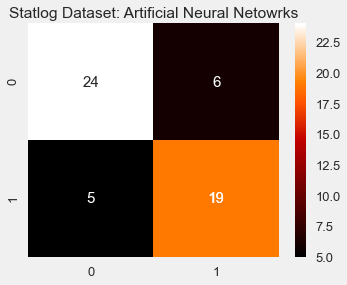

In [49]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

cmANN = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cmANN,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score

from sklearn.metrics import accuracy_score
acANN=accuracy_score(y_test, y_pred.round())
print('Accuracy: ',round(acANN*100,2),"%")
print("")

cmANN = confusion_matrix(y_test, y_pred.round())
plt.rcParams['figure.figsize'] = (5, 3)
sns.heatmap(cmANN, annot = True, annot_kws = {'size':15}, cmap = 'gist_heat').set(title="Statlog Dataset: Artificial Neural Netowrks")

crANN = classification_report(y_test, y_pred.round())
print(crANN)


In [50]:
recallANN = recall_score(y_test, y_pred.round())
print("Recall is: ",recallANN)

precisionANN = precision_score(y_test, y_pred.round())
print("Precision is: ",precisionANN)

f1_metricANN = f1_score(y_test, y_pred.round(), average = "macro")
print('F1-Score :', f1_metricANN)

Recall is:  0.7916666666666666
Precision is:  0.76
F1-Score : 0.7945347630577655


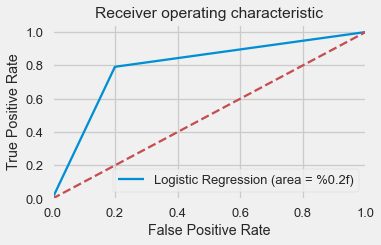

In [51]:
from sklearn.metrics import roc_curve, auc
fprANN, tprANN, thresholdsANN = roc_curve(y_test, y_pred.round())

plt.figure()
plt.plot(fprANN, tprANN, label='Logistic Regression (area = %0.2f)' )
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic',fontweight=30)
plt.legend(loc="lower right")
plt.rcParams['figure.figsize'] = (15, 5)
plt.savefig('Log_ROC')
plt.show()

In [52]:
from sklearn.metrics import auc
aucANN = auc(fprANN, tprANN)
print("AUC Score :", aucANN)

AUC Score : 0.7958333333333334


In [53]:
print("--------------------------------------------------")
print("      RESULTS FOR LOGISTIC REGRESSION             ")
print("--------------------------------------------------")
print(" Accuracy  : ", round(accLR*100,2),"%")
print(" AUC Score : ", round(aucLR*100,2),"%")
print(" Precision : ", round(precisionLR*100,2),"%")
print(" Recall    : ", round(recallLR*100,2),"%")
print(' F1-Score  : ', round(f1_metricLR*100,2),"%")
print("--------------------------------------------------")
print(" ")


print("--------------------------------------------------")
print("            RESULTS FOR NAIVE BAYES               ")
print("--------------------------------------------------")
print(" Accuracy  : ", round(accNB*100,2),"%")
print(" AUC Score : ", round(aucNB*100,2),"%")
print(" Precision : ", round(precisionNB*100,2),"%")
print(" Recall    : ", round(recallNB*100,2),"%")
print(' F1-Score  : ', round(f1_metricNB*100,2),"%")
print("--------------------------------------------------")
print(" ")



print("--------------------------------------------------")
print("           RESULTS FOR RANDOM FOREST              ")
print("--------------------------------------------------")
print(" Accuracy  : ", round(accRF*100,2),"%")
print(" AUC Score : ", round(aucRF*100,2),"%")
print(" Precision : ", round(precisionRF*100,2),"%")
print(" Recall    : ", round(recallRF*100,2),"%")
print(' F1-Score  : ', round(f1_metricRF*100,2),"%")
print("--------------------------------------------------")
print(" ")



print("--------------------------------------------------")
print("   RESULTS FOR ARTIFICIAL NEURAL NETWORK    ")
print("--------------------------------------------------")
print(' Accuracy  : ', round(acANN*100,2),"%")
print(" AUC Score : ", round(aucANN*100,2),"%")
print(" Precision : ", round(precisionANN*100,2),"%")
print(" Recall    : ", round(recallANN*100,2),"%")
print(' F1-Score  : ', round(f1_metricANN*100,2),"%")
print("--------------------------------------------------")

--------------------------------------------------
      RESULTS FOR LOGISTIC REGRESSION             
--------------------------------------------------
 Accuracy  :  81.48 %
 AUC Score :  85.69 %
 Precision :  81.82 %
 Recall    :  75.0 %
 F1-Score  :  81.07 %
--------------------------------------------------
 
--------------------------------------------------
            RESULTS FOR NAIVE BAYES               
--------------------------------------------------
 Accuracy  :  79.63 %
 AUC Score :  79.17 %
 Precision :  78.26 %
 Recall    :  75.0 %
 F1-Score  :  79.28 %
--------------------------------------------------
 
--------------------------------------------------
           RESULTS FOR RANDOM FOREST              
--------------------------------------------------
 Accuracy  :  77.78 %
 AUC Score :  84.03 %
 Precision :  77.27 %
 Recall    :  70.83 %
 F1-Score  :  77.28 %
--------------------------------------------------
 
--------------------------------------------------
   

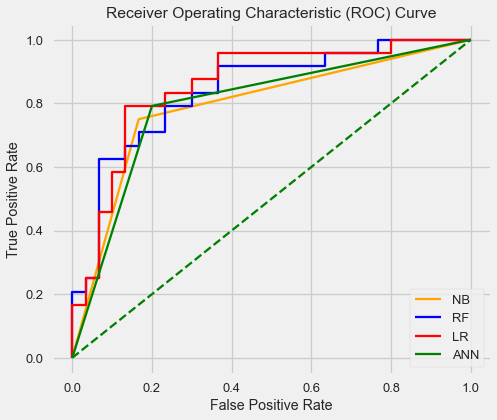

In [64]:
plt.plot(fprNB, tprNB, color='orange', label='NB') 
plt.plot(fprRF,tprRF, color='blue', label='RF')  
plt.plot(fprLR, tprLR, color='red', label='LR')
plt.plot(fprANN, tprANN, color='green', label='ANN')

plt.rcParams['figure.figsize'] = (7,6)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

In [55]:
# importing ML Explanability Libraries
#for purmutation importance
import eli5 
from eli5.sklearn import PermutationImportance

#for SHAP values
import shap 
from pdpbox import pdp, info_plots #for partial plots
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import shap

shap.initjs()

In [56]:
# let's check the importance of each attributes

perm = PermutationImportance(logreg, random_state = 0).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

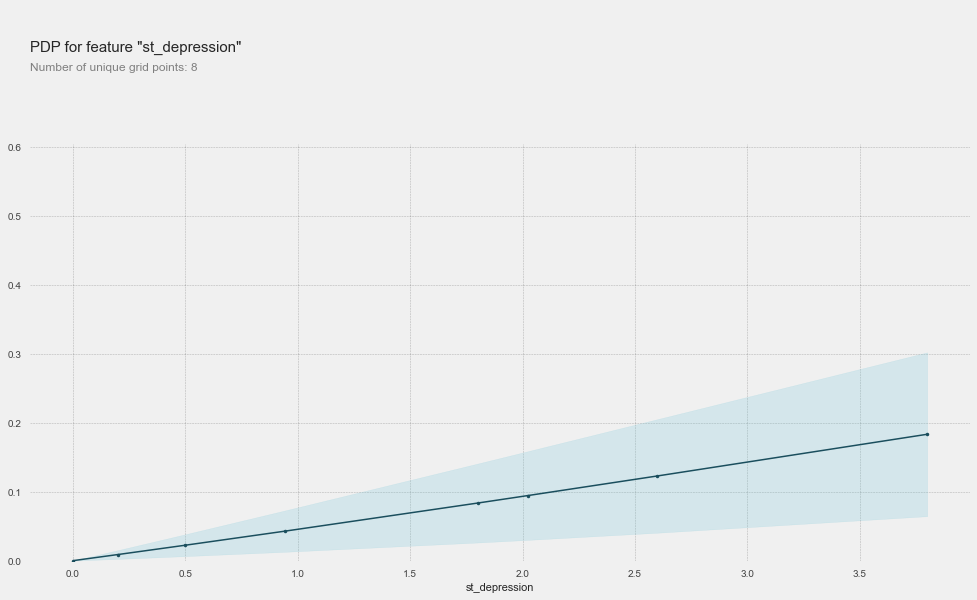

In [57]:
# plotting the partial dependence plot for num_major_vessels

base_features = data4.columns.values.tolist()
feat_name = 'st_depression'
pdp_dist = pdp.pdp_isolate(model=logreg, dataset=x_test, model_features = base_features, feature = feat_name)
pdp.pdp_plot(pdp_dist, feat_name)
plt.show()


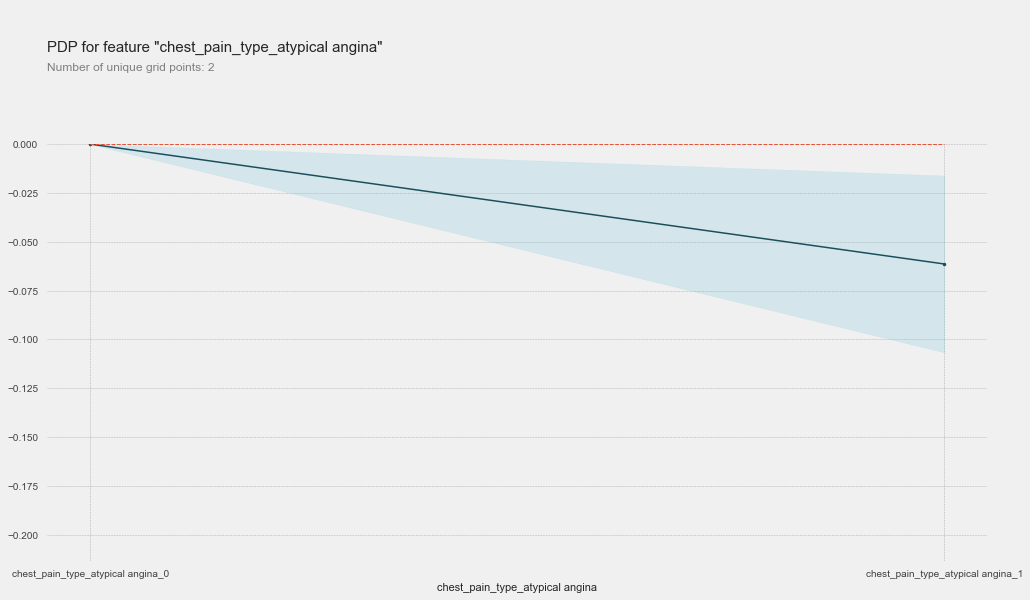

In [58]:
# Partial dependence graph for chest_pain_type_atypical angina

base_features = data4.columns.values.tolist()

feat_name = 'chest_pain_type_atypical angina'
pdp_dist = pdp.pdp_isolate(model = logreg, dataset = x_test, model_features = base_features, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()


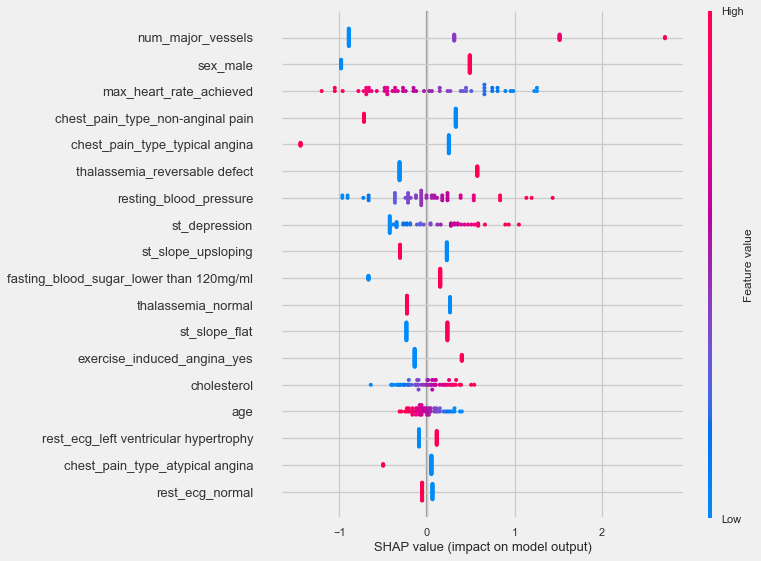

In [59]:
# shap values
# explainer = shap.LinearExplainer(model=logreg)
# shap_values = explainer.shap_values(x_test)
# shap.summary_plot(shap_values[1], x_test, plot_type="bar")


explainer=shap.LinearExplainer(logreg,x_test)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test, feature_names=x_test.columns)

In [60]:
# A function to check the patient's conditions

def patient_analysis(logreg, patient):
    explainer = shap.LinearExplainer(logreg,x_train)
    shap_values = explainer.shap_values(patient)
    shap.initjs()
    return shap.force_plot(explainer.expected_value, shap_values, patient)


In [61]:
patients = x_test.iloc[1,:].astype(float)
patient_analysis(logreg, patients)


In [62]:
patients = x_test.iloc[2,:].astype(float)
patient_analysis(logreg, patients)

In [63]:
shap_values = explainer.shap_values(x_train.iloc[:50])
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x_test.iloc[:50])